In [1]:
# violent crime = rape or sexual assault, robbery, aggravated and simple assault
# https://en.wikipedia.org/wiki/Violent_crime



In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time 




In [3]:
output_path = "csv_output/crime_cnt_df.csv"

#This section is where we gather crime data

ORI_file = "csv_data/ORI.csv"

#import ORI file into a dataframe for analysis.
ORI_df = pd.read_csv(ORI_file, header=None)
ORI_df


,0,1,2,3,4,5,6
0,TX1010000,HARRIS CO SO HOUSTON,SHERIFF'S OFFICE,NaN,NaN,2,HARRIS
1,TX1010100,BAYTOWN PD,BAYTOWN PD,NaN,NaN,3,HARRIS
2,TX101013A,COUNTY ATTORNEY'S OFFICE HOUSTON,COUNTY ATTORNEY'S OFFICE,NaN,NaN,6,HARRIS
3,TX101015A,DISTRICT ATTORNEYS OFFICE HOUSTON,DISTRICT ATTORNEY'S,OFFICE,NaN,6,HARRIS
4,TX101015Y,HEALTH AND HUMAN SERV COMM OIG,HEALTH & HUMAN SERV COMMISSION,OFFICE OF INSPECTOR GENERAL,HOUSTON,6,HARRIS
5,TX101017Y,SOCIAL SECURITY ADMINISTRATION,SOCIAL SECURITY ADMINISTRATION,INSPECTOR GENERAL,OFFICE,6,HARRIS
6,TX1010200,BELLAIRE PD,BELLAIRE PD,NaN,NaN,3,HARRIS
7,TX101023G,JUVENILE PROBATION OFFICE HOUSTON,HARRIS COUNTY,JUVENILE PROBATION DEPT,NaN,6,HARRIS
8,TX101023Y,PASADENA FIRE MARSHAL ARSON DIVISION,PASADENA FIRE MARSHAL,ARSON DIVISION,NaN,6,HARRIS
9,TX101023Y,PASADENA FIRE MARSHAL ARSON DIVISION,PASADENA FIRE MARSHAL,ARSON DIVISION,NaN,6,HARRIS


In [4]:
weather_data_path = "csv_data/HOU_daily.csv"

In [5]:
weather_data_df = pd.read_csv(weather_data_path)
weather_data_df.head()

,Site4,Year,Max Temp,Min Temp,Avg Temp,HDDs,CDDs,Precipitation Water Equiv,Snowfall,Snow/Ice Depth,Full Date
0,HOU,1964,62,28,45.0,20.0,0.0,0.00,0.0,0.0,1/1/64
1,HOU,1964,70,36,53.0,12.0,0.0,0.00,0.0,0.0,1/2/64
2,HOU,1964,72,44,58.0,7.0,0.0,0.06,0.0,0.0,1/3/64
3,HOU,1964,61,50,55.5,9.5,0.0,0.00,0.0,0.0,1/4/64
4,HOU,1964,55,43,49.0,16.0,0.0,0.09,0.0,0.0,1/5/64


In [6]:
income_csv = "csv_data/income.csv"
income_df = pd.read_csv(income_csv)
income_df
    

,year,median_household_income
0,1997,39037
1,1998,40690
2,1999,41466
3,2000,41220
4,2001,43279
5,2002,42704
6,2003,42262
7,2004,41922
8,2005,44085
9,2006,47159


In [7]:
# for index, row in ORI_df.iterrows():
#     print(row[0], ' County: ', row[6])

In [8]:
# for row in test:
#     print(test.iloc[row,0])

In [9]:
#Bodily Harm Data 
#     Aggravated_assault
#     Manslaughter
#     Murder
#     Offense_family
#     Rape
#     Simple_assault

#Optional: 
#     Robbery
#     Arson
#  Only grabbing these items from the CDE API

# these are the crime stat lists.
year_list = [1997,1998,1999,2000,2001,2002,2003,
             2004,2005,2006,2007,2008,2009,2010,
             2011,2012,2013,2014,2015,2016,2017]
agg_assult = []
off_fam = []
rape = []
simp_assult = []
robbery = []
manslaut = []
murder = []

#national lists
N_agg_assult = []
N_agg_assult = []
N_off_fam = []
N_rape = []
N_simp_assult = []
N_robbery = []
N_manslaut = []
N_murder = []

# these will be used for the totals on the crime dataframe.  
# They are all in a series. 
# We are setting them to 0 so they can be added to. 
agg_assult_cnt = 0
off_fam_cnt = 0
rape_cnt = 0
simp_assult_cnt = 0
robbery_cnt = 0
manslaut_cnt = 0
murder_cnt = 0

# pause_counter = 0
# df = ORI_df

    
        


In [10]:
# This function finds the average for a missing year.  
# If the loop comes across a missing year in the API, 
# it grabs the data for the prior year and the data for the next year and returns and average. 
# But if the API is missing a block of 3 or more years in a row, it will just 0 out that data. 
# You'll be able to see the agency and how much data it is missing below when you run the script. 

def missing_data(crime_var,key_api):
    
    if apidx != 0 and apidx-1 != 0:
        crime_var.append((crime_data["results"][apidx][key_api] + crime_data["results"][apidx-1][key_api])/2)
#         print(apidx)
#         print(crime_data["results"][apidx][key_api])
#         print(apidx-1)
#         print(crime_data["results"][apidx-1][key_api])
#         print(crime_var)
    else: 
        crime_var.append(0)
        print(crime_var)

In [11]:
#URL call for crime data on the national level using a public API key.
national_url = "https://api.usa.gov/crime/fbi/sapi/api/data/arrest/national/offense/all/1997/2017?API_KEY=iiHnOKfno2Mgkt5AynpvPpUQTEyxE77jo1RU8PIv"
national_crime_data = requests.get(national_url).json()

 #gather national data
nidx = 0    
for x in year_list:
    
    N_agg_assult.append(national_crime_data["results"][nidx]["aggravated_assault"])
    N_off_fam.append(national_crime_data["results"][nidx]["offense_family"])
    N_rape.append(national_crime_data["results"][nidx]["rape"])
    N_simp_assult.append(national_crime_data["results"][nidx]["simple_assault"])
    N_robbery.append(national_crime_data["results"][nidx]["robbery"])
    N_manslaut.append(national_crime_data["results"][nidx]["manslaughter"])
    N_murder.append(national_crime_data["results"][nidx]["murder"])
    nidx+=1


In [12]:
national_crime_cnt_df = pd.DataFrame({"Year":year_list,
                             "Aggravated Assault":N_agg_assult,
                             "Simple Assault":N_simp_assult,
                             "Rape":N_rape,
                             "Robbery":N_robbery,
                             "Domestic Violence":N_off_fam,
                             "Manslaughter":N_manslaut,
                             "Murder":N_murder
                            }) 

national_crime_cnt_df["Total"] = national_crime_cnt_df.iloc[:, 1:8].sum(axis = 1)
national_crime_cnt_df["Total (based on US definition)"] = national_crime_cnt_df.iloc[:,1:5].sum(axis = 1)
national_crime_cnt_df

,Year,Aggravated Assault,Simple Assault,Rape,Robbery,Domestic Violence,Manslaughter,Murder,Total,Total (based on US definition)
0,1997,411945,1047244,24962,121170,110275,1466,14388,1731450,1605321
1,1998,391351,1023490,23974,107977,104843,1224,13583,1666442,1546792
2,1999,367800,981595,21996,97298,101426,1226,12032,1583373,1468689
3,2000,365241,982363,21287,93261,98323,1193,11405,1573073,1462152
4,2001,374416,1011616,21375,95651,102934,1195,11379,1618566,1503058
5,2002,362097,997539,21776,84767,103909,1321,10846,1582255,1466179
6,2003,346426,978240,20531,82804,102968,1249,10471,1542689,1428001
7,2004,333293,997968,20034,83514,93732,1207,10211,1539959,1434809
8,2005,346495,1018998,19874,89443,100096,1190,10837,1586933,1474810
9,2006,338324,1004875,18054,96484,95947,1310,10181,1565175,1457737


In [13]:
# Because we are loopign through a dataframe (ORI_df), we need to use an iterrows loop.
# A basic for loop makes it count by columns instead of by rows. 
# https://cmdlinetips.com/2018/12/how-to-loop-through-pandas-rows-or-how-to-iterate-over-pandas-rows/

for index, row in ORI_df.iterrows():
    
# URL calls using a public API Key (iiHnOKfno2Mgkt5AynpvPpUQTEyxE77jo1RU8PIv).   
    crime_url = "https://api.usa.gov/crime/fbi/sapi/api/data/arrest/agencies/offense/"
    query_url = f"{crime_url}{row[0]}/violent_crime/1997/2017?API_KEY=iiHnOKfno2Mgkt5AynpvPpUQTEyxE77jo1RU8PIv"
    
    crime_data = requests.get(query_url).json()

    # Counters
    apidx = 0       #APi InDeX - this is for each dictionary in the API
    yridx = 0       #YeaR InDeX - this is for the contents of the year[list] up above.  It will be used to test if the year exists in the API.

    print(row[0])   # Just used for confirmation that the loop is working.  This may get commented out later. 

    # Try the section below unless you get a KeyError:
    # If we get a KeyError, it is because the page doesn't exist. Display the ORI as failed, and move on to the next one. 
    try:       
        
        # Loop through the APIs using the year_list[].  
        # First test to make sure the Year data exists.  
        # If it doesn't 0 out that part of the list. 
        for dates in year_list:
            
            # Next try testing to see if there year in year_list[] matches with the year in the API.  
            # If it does, then grab the data and append the lists. 
            # If it doesn't, run the missing data function to see we can get an average for the missing year. 
            # If we get an IndexError, it is because the API doesn't have as many years as year_list[] 
            # the API ended too soon and so the index doesn't match up with year_list[]
            # zero it out for that missing year and move on. 
            try:
                if year_list[yridx] == crime_data["results"][apidx]["data_year"]:

                    # print(crime_data["results"][apidx]["data_year"]) # This is just for testing.
                    agg_assult.append(crime_data["results"][apidx]["aggravated_assault"])
                    off_fam.append(crime_data["results"][apidx]["offense_family"])
                    rape.append(crime_data["results"][apidx]["rape"])
                    simp_assult.append(crime_data["results"][apidx]["simple_assault"])
                    robbery.append(crime_data["results"][apidx]["robbery"])
                    manslaut.append(crime_data["results"][apidx]["manslaughter"])
                    murder.append(crime_data["results"][apidx]["murder"])
                   
                    
                    apidx += 1
                    yridx += 1

                else:
                    missing_data(agg_assult,"aggravated_assault")
                    missing_data(off_fam,"offense_family")
                    missing_data(rape,"rape")
                    missing_data(simp_assult,"simple_assault")
                    missing_data(robbery,"robbery")
                    missing_data(manslaut,"manslaughter")
                    missing_data(murder,"murder")
                    yridx += 1
            
            except IndexError:
                agg_assult.append(0)
                off_fam.append(0)
                rape.append(0)
                simp_assult.append(0)
                robbery.append(0)
                manslaut.append(0)
                murder.append(0)
        
        # turn the list into a series
        agg_assult_sr = pd.Series(agg_assult)
        
        # add the series contents into the count dataframe
        agg_assult_cnt = agg_assult_cnt + agg_assult_sr
        
        # empty out the list so it can be refilled when it loops to the next API. 
        del agg_assult[:]

        simp_assult_sr = pd.Series(simp_assult)  
        simp_assult_cnt = simp_assult_cnt + simp_assult_sr
        round(simp_assult_cnt)
        del simp_assult[:]

        rape_sr = pd.Series(rape)  
        rape_cnt = rape_cnt + rape_sr
        round(rape_cnt)
        del rape[:]

        robbery_sr = pd.Series(robbery)
        robbery_cnt = robbery_cnt + robbery_sr
        round(robbery_cnt)
        del robbery[:]
        
        off_fam_sr = pd.Series(off_fam)  
        off_fam_cnt = off_fam_cnt + off_fam_sr
        round(off_fam_cnt)
        del off_fam[:]

        manslaut_sr = pd.Series(manslaut)  
        manslaut_cnt = manslaut_cnt + manslaut_sr
        round(manslaut_cnt)
        del manslaut[:]

        murder_sr = pd.Series(murder)  
        murder_cnt = murder_cnt + murder_sr
        round(murder_cnt)
        del murder[:]
    
    except KeyError:
        print(f"exception: {row[0]} - No Data")
        

print('Completed API calls')

TX1010000
TX1010100
TX101013A
exception: TX101013A - No Data
TX101015A
exception: TX101015A - No Data
TX101015Y
exception: TX101015Y - No Data
TX101017Y
exception: TX101017Y - No Data
TX1010200
TX101023G
exception: TX101023G - No Data
TX101023Y
exception: TX101023Y - No Data
TX101023Y
exception: TX101023Y - No Data
TX101025A
exception: TX101025A - No Data
TX101035U
exception: TX101035U - No Data
TX1010400
TX1010600
TX101065Y
exception: TX101065Y - No Data
TX101065Y
exception: TX101065Y - No Data
TX101075Y
exception: TX101075Y - No Data
TX1010900
TX1011100
TX1011200
TX1011300
TX1011400
exception: TX1011400 - No Data
TX1011500
exception: TX1011500 - No Data
TX1011700
exception: TX1011700 - No Data
TX1011800
exception: TX1011800 - No Data
TX1011900
exception: TX1011900 - No Data
TX1012000
exception: TX1012000 - No Data
TX1012100
exception: TX1012100 - No Data
TX1012300
exception: TX1012300 - No Data
TX1012400
exception: TX1012400 - No Data
TX1012500
exception: TX1012500 - No Data
TX101260

In [14]:
crime_cnt_df = pd.DataFrame({"Year":year_list,
                             "Aggravated Assault":agg_assult_cnt,
                             "Simple Assault":simp_assult_cnt,
                             "Rape":rape_cnt,
                             "Robbery":robbery_cnt,
                             "Domestic Violence":off_fam_cnt,
                             "Manslaughter":manslaut_cnt,
                             "Murder":murder_cnt
                            }) 

crime_cnt_df["Total"] = crime_cnt_df.iloc[:, 1:8].sum(axis = 1)


# US definition of violent crime is:  Aggravated and Simple Assault, Rape, and Robbery. 
# Murder and Manslaughter are counted seperately. 
# Human Trafficing, Animal Cruelty, etc. are in another catagory as well. 
crime_cnt_df["Total (based on US definition)"] = crime_cnt_df.iloc[:,1:5].sum(axis = 1)
crime_cnt_df["US Total"] = national_crime_cnt_df["Total"]

crime_cnt_df

,Year,Aggravated Assault,Simple Assault,Rape,Robbery,Domestic Violence,Manslaughter,Murder,Total,Total (based on US definition),US Total
0,1997,800.0,1545.0,54.0,176.0,37.0,12.0,28.0,2652.0,2575.0,1731450
1,1998,854.0,1396.0,132.0,196.0,50.0,9.0,34.0,2671.0,2578.0,1666442
2,1999,1025.0,3104.0,75.0,252.0,91.0,4.0,34.0,4585.0,4456.0,1583373
3,2000,980.0,3301.0,47.0,266.0,103.0,6.0,45.0,4748.0,4594.0,1573073
4,2001,1127.0,3502.0,41.0,311.0,96.0,2.0,47.0,5126.0,4981.0,1618566
5,2002,1197.0,3800.0,42.0,432.0,147.0,12.0,41.0,5671.0,5471.0,1582255
6,2003,1329.0,4192.0,79.0,441.0,189.0,11.0,43.0,6284.0,6041.0,1542689
7,2004,1545.0,4472.0,65.0,470.0,135.0,12.0,51.0,6750.0,6552.0,1539959
8,2005,1678.0,4766.0,66.0,490.0,198.0,12.0,55.0,7265.0,7000.0,1586933
9,2006,1666.0,5206.0,52.0,535.5,262.5,24.0,65.5,7811.5,7459.5,1565175


In [15]:
avg_temps=[]
min_temps=[]
max_temps=[]
weather_sum={}
#Initializing variables to hold calculated or filtered data for each year to be appended to lists
avg_temp=0
min_temp=0
max_temp=0
#variable to hold value of year
year=1997
#filter rows for each year using  the boolean expression
for year in range(1997,2018):
    new_df=weather_data_df[weather_data_df['Year']==year]
    avg_temp=new_df['Avg Temp'].mean()
    min_temp=new_df['Min Temp'].min()
    max_temp=new_df['Max Temp'].max()
    avg_temps.append(avg_temp)
    min_temps.append(min_temp)
    max_temps.append(max_temp)
    year+=1
print(avg_temps)
print(min_temps)
print(max_temps)

[69.3945205479452, 72.37397260273973, 71.65205479452055, 71.14207650273224, 69.96712328767123, 69.97534246575343, 69.96027397260274, 70.95218579234972, 71.45205479452055, 71.46164383561644, 71.04657534246576, 71.17896174863388, 71.15342465753425, 69.83287671232877, 72.45205479452055, 72.59972677595628, 70.36301369863014, 69.5986301369863, 71.33972602739726, 72.90573770491804, 73.2931506849315]
[30, 29, 29, 30, 29, 25, 28, 28, 34, 30, 29, -1, 27, 21, 23, 31, 31, 25, 30, 32, 23]
[98, 102, 101, 108, 97, 97, 102, 97, 100, 99, 102, 104, 103, 99, 105, 102, 105, 98, 104, 99, 102]


In [16]:
avg_temps = [round(t,2) for t in avg_temps]
crime_cnt_df["Average Temperature"] = avg_temps
crime_cnt_df["Minimum Temperature"] = min_temps
crime_cnt_df["Maximum Temperature"] = max_temps

In [17]:
crime_cnt_df["Household Median Income"] = income_df["median_household_income"]


In [18]:
# crime_cnt_df["Year"].astype(str)
crime_cnt_df

,Year,Aggravated Assault,Simple Assault,Rape,Robbery,Domestic Violence,Manslaughter,Murder,Total,Total (based on US definition),US Total,Average Temperature,Minimum Temperature,Maximum Temperature,Household Median Income
0,1997,800.0,1545.0,54.0,176.0,37.0,12.0,28.0,2652.0,2575.0,1731450,69.39,30,98,39037
1,1998,854.0,1396.0,132.0,196.0,50.0,9.0,34.0,2671.0,2578.0,1666442,72.37,29,102,40690
2,1999,1025.0,3104.0,75.0,252.0,91.0,4.0,34.0,4585.0,4456.0,1583373,71.65,29,101,41466
3,2000,980.0,3301.0,47.0,266.0,103.0,6.0,45.0,4748.0,4594.0,1573073,71.14,30,108,41220
4,2001,1127.0,3502.0,41.0,311.0,96.0,2.0,47.0,5126.0,4981.0,1618566,69.97,29,97,43279
5,2002,1197.0,3800.0,42.0,432.0,147.0,12.0,41.0,5671.0,5471.0,1582255,69.98,25,97,42704
6,2003,1329.0,4192.0,79.0,441.0,189.0,11.0,43.0,6284.0,6041.0,1542689,69.96,28,102,42262
7,2004,1545.0,4472.0,65.0,470.0,135.0,12.0,51.0,6750.0,6552.0,1539959,70.95,28,97,41922
8,2005,1678.0,4766.0,66.0,490.0,198.0,12.0,55.0,7265.0,7000.0,1586933,71.45,34,100,44085
9,2006,1666.0,5206.0,52.0,535.5,262.5,24.0,65.5,7811.5,7459.5,1565175,71.46,30,99,47159


In [19]:
crime_cnt_df.to_csv(output_path, index=True)


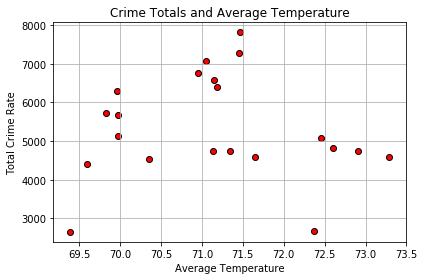

In [20]:
crime_avg_temp_plt = plt.scatter(x=crime_cnt_df["Average Temperature"], 
                           y=crime_cnt_df["Total"], 
#                            s=crime_cnt_df["Total"]/10, 
                           color="red", 
                           edgecolor = "black") 
#                            alpha = .5, 
#                            label = "Crime Total")

plt.title("Crime Totals and Average Temperature")
plt.xlabel("Average Temperature")
plt.ylabel("Total Crime Rate")
plt.grid()
plt.tight_layout()
plt.savefig("output_plot/crime_total_avg_temp.png", bbox_inches = "tight")
plt.show()



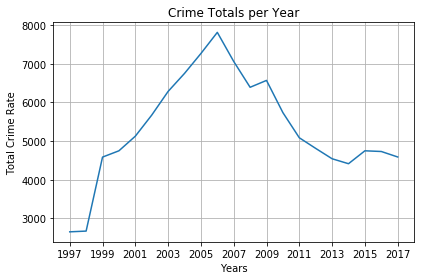

In [21]:
x_axis = [1997, 1999, 2001, 2003, 2005, 2007, 2009, 2011, 2013, 2015, 2017]

plt.plot(crime_cnt_df["Year"], crime_cnt_df["Total"]) 

plt.xticks(x_axis)                                          
plt.title("Crime Totals per Year")
plt.xlabel("Years")
plt.ylabel("Total Crime Rate")
plt.grid()
plt.tight_layout()
plt.savefig("output_plot/crime_total_per_year.png", bbox_inches = "tight")
plt.show()

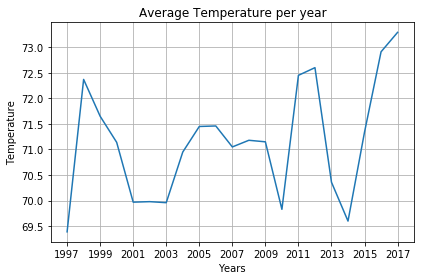

In [22]:
plt.plot(crime_cnt_df["Year"], crime_cnt_df["Average Temperature"]) 

plt.xticks(x_axis)                                          
plt.title("Average Temperature per year")
plt.xlabel("Years")
plt.ylabel("Temperature")
plt.grid()
plt.tight_layout()
plt.savefig("output_plot/average_temp_per_year.png", bbox_inches = "tight")
plt.show()

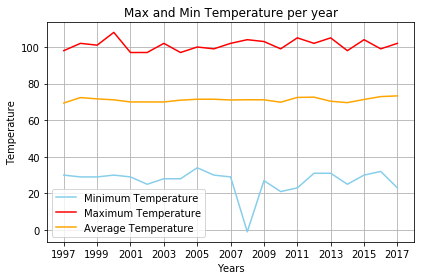

In [23]:
plt.plot(crime_cnt_df["Year"], crime_cnt_df["Minimum Temperature"], color = "skyblue")
plt.plot(crime_cnt_df["Year"], crime_cnt_df["Maximum Temperature"], color = "red")
plt.plot(crime_cnt_df["Year"], crime_cnt_df["Average Temperature"], color = "orange")
plt.legend()
plt.xticks(x_axis)                                          
plt.title("Max and Min Temperature per year")
plt.xlabel("Years")
plt.ylabel("Temperature")
plt.grid()
plt.tight_layout()
plt.savefig("output_plot/max_and_min_temp_per_year.png", bbox_inches = "tight")
plt.show()

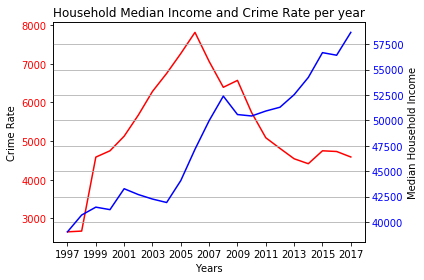

In [24]:
fig, ax1 = plt.subplots()

ax1.set_xlabel('Years')
ax1.set_ylabel('Crime Rate')
ax1.plot(crime_cnt_df["Year"], crime_cnt_df["Total"], color="red")
ax1.tick_params(axis='y', labelcolor="red")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis


ax2.set_ylabel('Median Household Income')  # we already handled the x-label with ax1
ax2.plot(crime_cnt_df["Year"], crime_cnt_df["Household Median Income"], color="blue")
ax2.tick_params(axis='y', labelcolor="blue")


plt.xticks(x_axis)                                          
plt.title("Household Median Income and Crime Rate per year")
plt.grid()
plt.tight_layout()
plt.savefig("output_plot/income_vs_crime_per_year.png", bbox_inches = "tight")
plt.show()

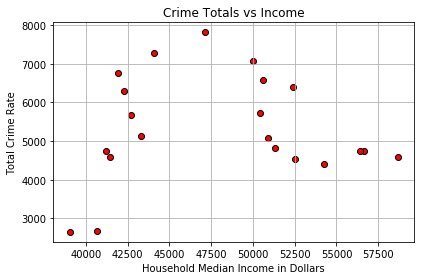

In [25]:
crime_vs_income_plt = plt.scatter(x=crime_cnt_df["Household Median Income"], 
                                  y=crime_cnt_df["Total"], 
                                  color="red", 
                                  edgecolor = "black") 

plt.title("Crime Totals vs Income")
plt.xlabel("Household Median Income in Dollars")
plt.ylabel("Total Crime Rate")
plt.grid()
plt.tight_layout()
plt.savefig("output_plot/crime_vs_income.png", bbox_inches = "tight")
plt.show()


In [26]:
# crime_bubble = plt.scatter(x=crime_cnt_df["Household Median Income"], 
#                            y=crime_cnt_df["Average Temperature"], 
#                            s=crime_cnt_df["Total"]*.1, 
#                            color="red", 
#                            edgecolor = "black", 
#                            alpha = .5)

# plt.title("Crime vs Temperature vs Median Household Income")
# plt.xlabel("Household Median Income in Dollars")
# plt.ylabel("Average Temperature")
# plt.grid()
# plt.tight_layout()
# plt.savefig("output_plot/crime_vs_temp_vs_income.png", bbox_inches = "tight")
# plt.show()